#  Klasifikasi Smoking Dataset from UK
Iin Febyanti

23083010006

Analisis Data Eksploratif 

# Deskripksi kasus
Data yang digunakan merupakan data survey tentang kebiasaan merokok dari Inggris. Dataset ini dapat digunakan untuk menganalisis karakteristik demografis perokok di Inggris. 

gender (Male and Female)

age (continuous)

marital_status (Dicoverd, Married, Separated, Single, and Widowed)

highest_qualification (levels A Levels, Degree, GCSE/CSE, GCSE/O Level, Higher/Sub Degree, No Qualification, ONC/BTEC and Other/Sub Degree)

nationality (British, English, Irish, Scottish, Welsh, Other, Refused and Unknown)

ethnicity (Asian, Black, Chinese, Mixed, White and Refused Unknown)

gross_income (Under 2,600, 2,600 to 5,200, 5,200 to 10,400, 10,400 to 15,600, 15,600 to 20,800, 20,800 to 28,600, 28,600 to 36,400, Above 36,400, Refused and Unknown)

region (London, Midlands & East Anglia, Scotland, South East, South West, The North and Wales)

smoke (No and Yes)

amt_weekends (Number of cigarettes smoked per day on weekends)

amt_weekdays (Number of cigarettes smoked per day on weekdays)

type (Packets, Hand-Rolled, Both/Mainly Packets and Both/Mainly Hand-Rolled)


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%pylab inline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                        AdaBoostClassifier, GradientBoostingClassifier
pylab.rcParams['figure.figsize'] = (10, 7)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\IIN FEBYANTI\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [73]:
import pandas as pd
data = pd.read_csv("C:/Users/IIN FEBYANTI/OneDrive/Sains Data/smoking.csv")
data.head()
data

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


In [74]:
data['smoke'].value_counts()

No     1270
Yes     421
Name: smoke, dtype: int64

In [75]:
data.isnull().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [76]:
data['amt_weekends'].fillna("None", inplace=True)
data['amt_weekdays'].fillna("None", inplace=True)
data['type'].fillna("None", inplace=True)

In [77]:
data.isnull().sum()

Unnamed: 0               0
gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64

In [78]:
data.head()
data

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,None,None,None
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,None,None,None
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,None,None,None
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,None,None,None
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,None,None,None
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   object
 11  amt_weekdays           1691 non-null   object
 12  type                   1691 non-null   object
dtypes: int64(2), object(11)
memory usage: 171.9+ KB


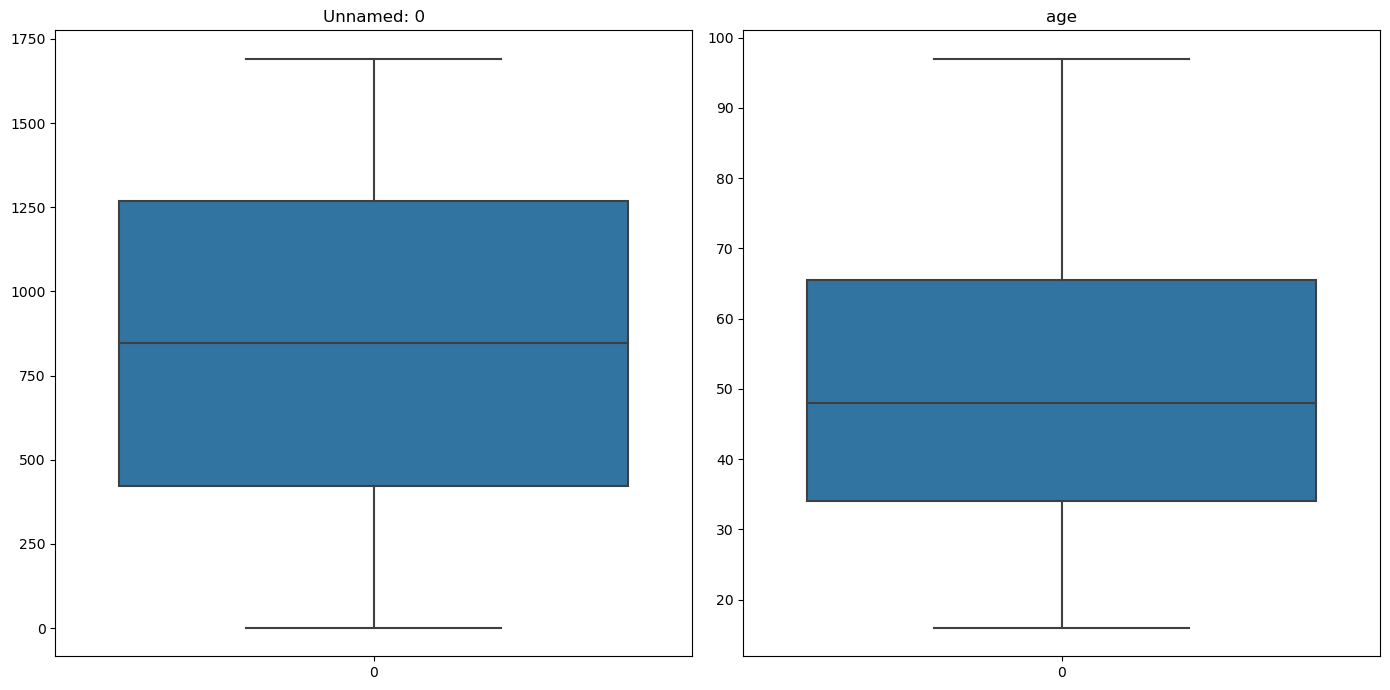

In [80]:
data_cont = data.drop(['gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'gross_income', 'region', 'smoke', 'amt_weekends', 'amt_weekdays', 'type'], axis=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7)) 
feature_index = 0
for jj in range(2):
    if feature_index < len(data_cont.columns): 
        ax = sns.boxplot(data_cont.iloc[:, feature_index], ax=axes[jj]) 
        ax.set(title=data_cont.columns.values[feature_index])
        feature_index += 1
plt.tight_layout()
plt.show()

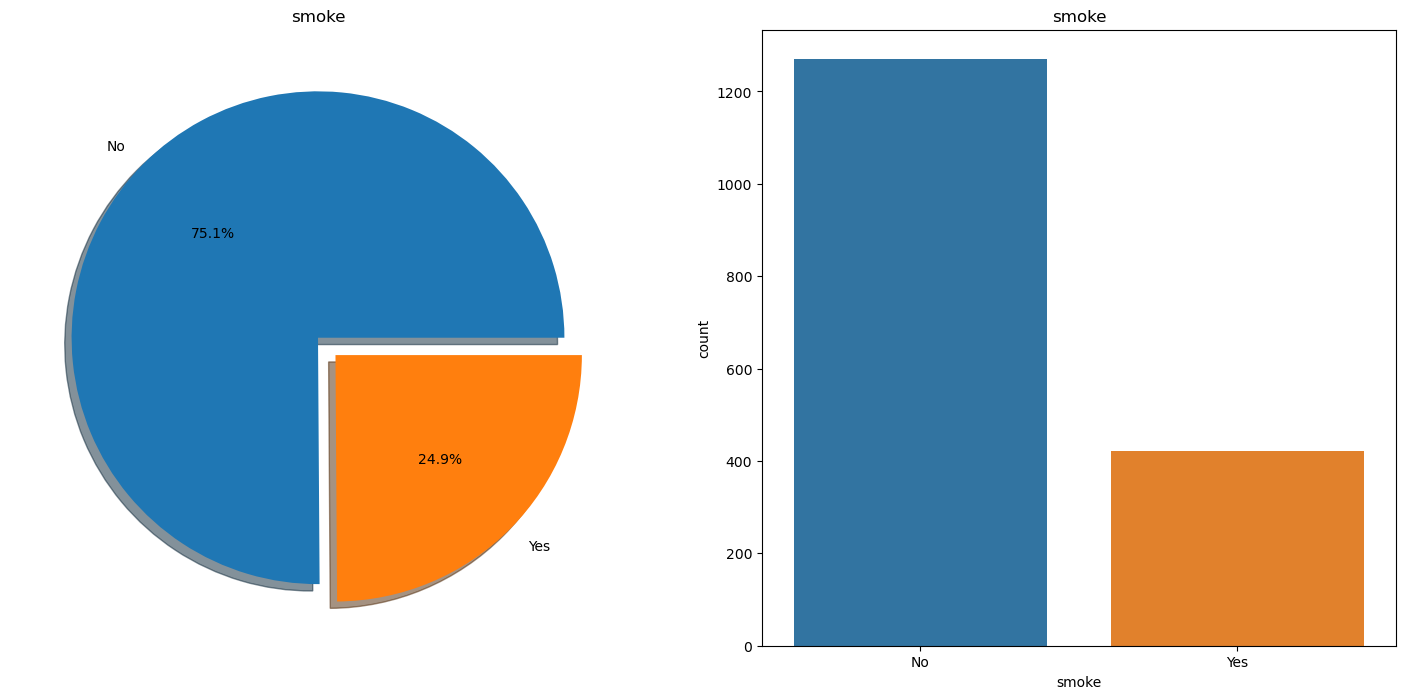

In [81]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['smoke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('smoke')
ax[0].set_ylabel('')
sns.countplot(x='smoke', data=data, ax=ax[1])
ax[1].set_title('smoke')
plt.show()

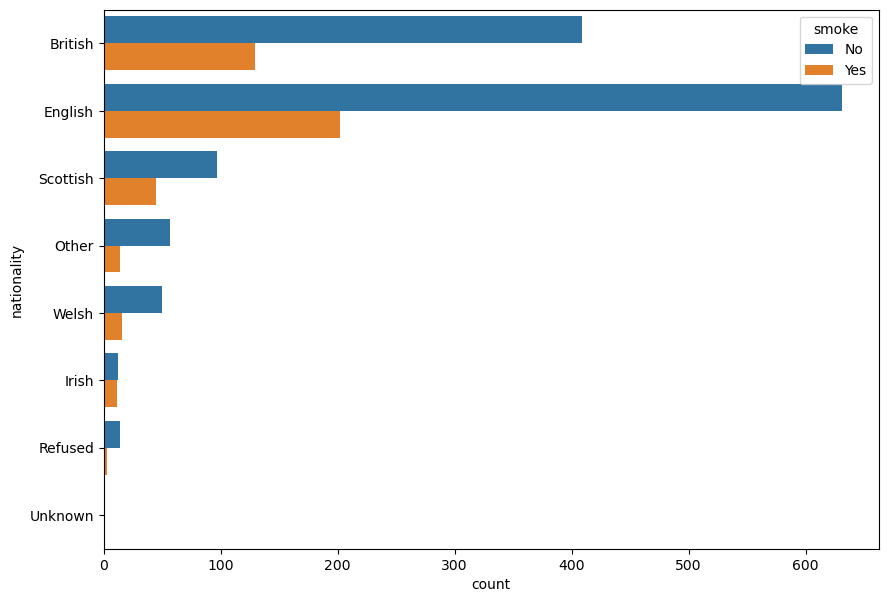

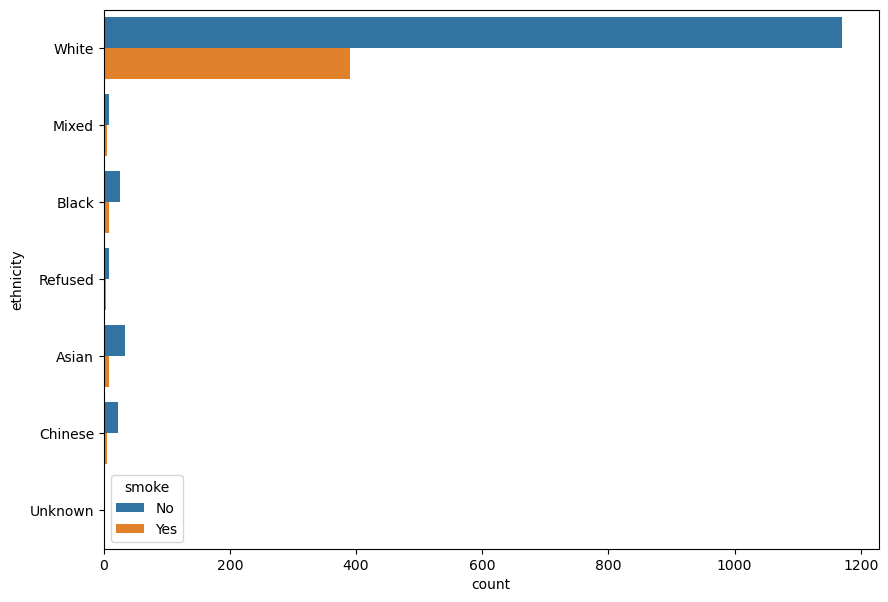

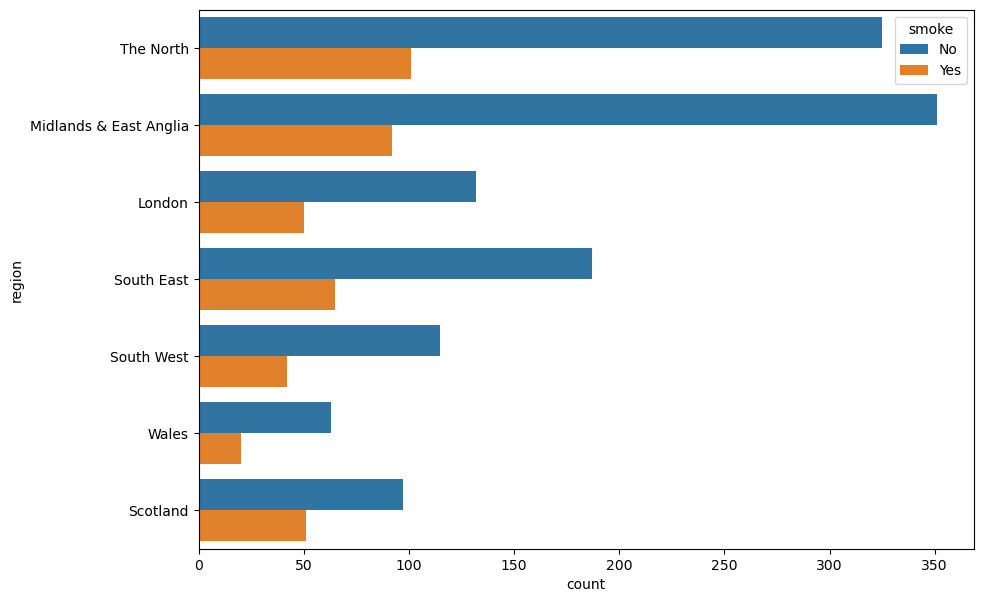

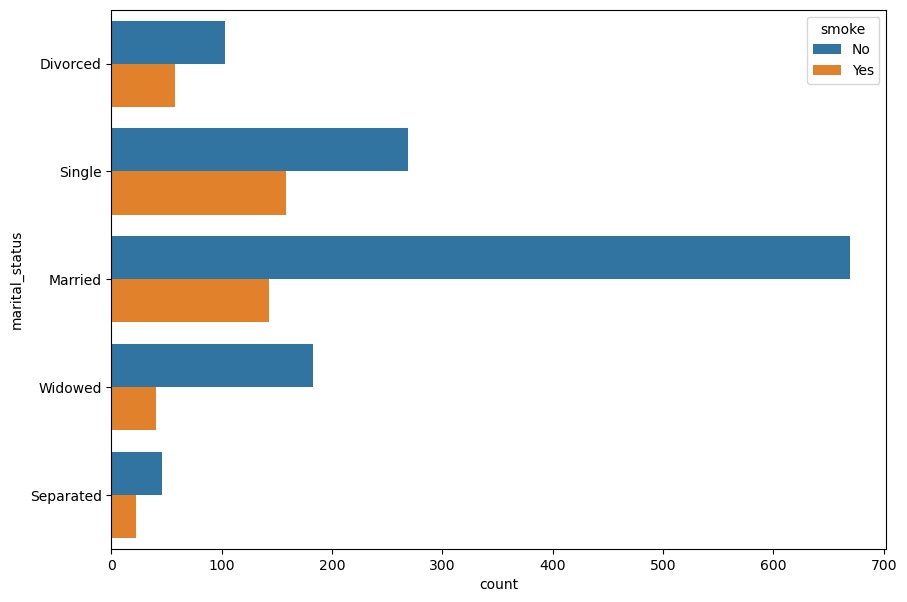

In [71]:
sns.countplot(y=data["nationality"], hue=data["smoke"])
plt.show()
sns.countplot(y=data["ethnicity"], hue=data["smoke"])
plt.show()
sns.countplot(y=data["region"], hue=data["smoke"])
plt.show()
sns.countplot(y=data["marital_status"], hue=data["smoke"])
plt.show()

C:\Users\IIN FEBYANTI\AppData\Local\Temp\ipykernel_1228\1143476676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


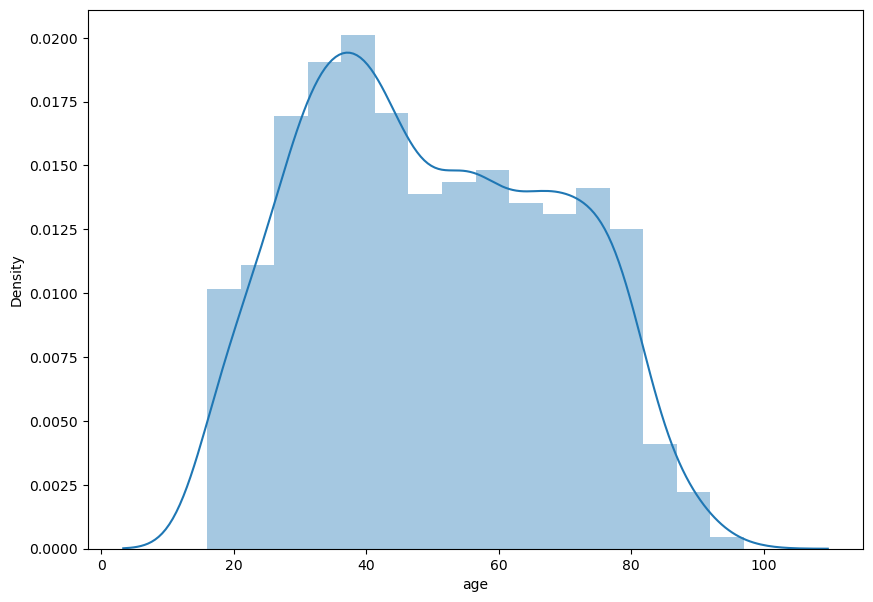

In [69]:
sns.distplot(data["age"])
plt.show()

C:\Users\IIN FEBYANTI\AppData\Local\Temp\ipykernel_1228\715865000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datafix.corr(),linewidths=.5,annot=True,cmap='RdYlGn')


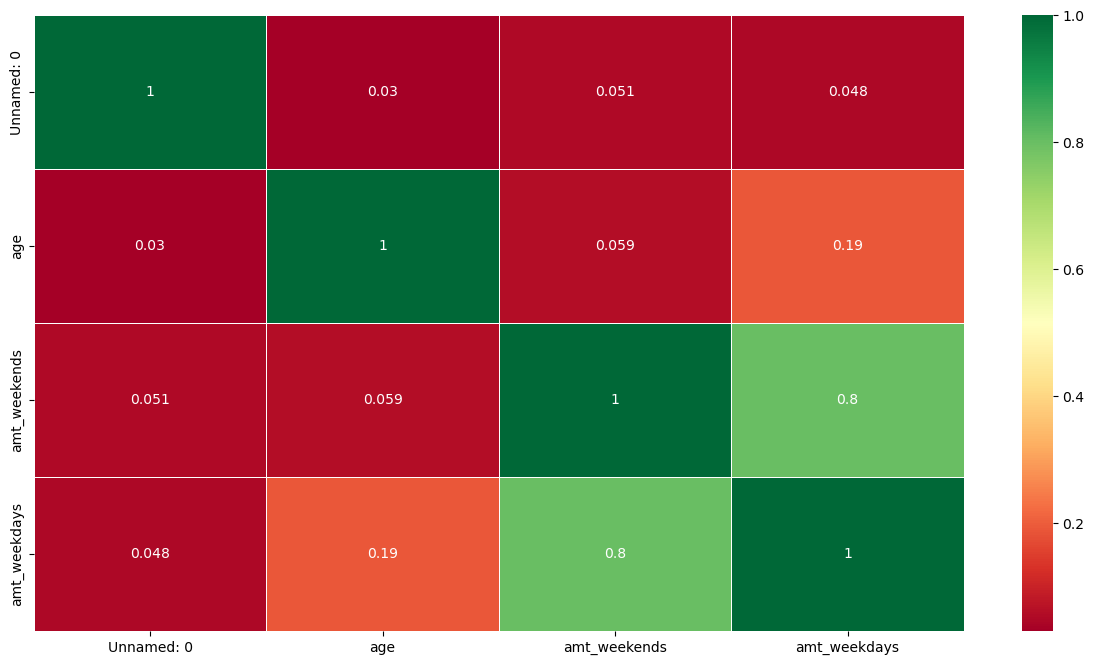

In [70]:
sns.heatmap(datafix.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()